In [1]:
import signalnet as sn
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data/testsetallwaves_sr22050.csv")
scaler = StandardScaler()

df["pre_filter"] = scaler.fit_transform(df["pre_filter"].to_numpy().reshape(-1,1))

In [3]:
X_train, X_test, y_train, y_test = sn.utilities.train_test(df["pre_filter"].to_numpy(), df["post_filter"].to_numpy())

In [4]:
X_train, X_test, y_train, y_test = sn.utilities.frame_up_ann(X_train, X_test, y_train, y_test, window=3)

In [5]:
X_train.shape

(705597, 3)

In [6]:
y_train.shape

(705597,)

In [7]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(16, input_shape=(3,), activation="tanh"))
model.add(keras.layers.Dense(128, activation="tanh"))
model.add(keras.layers.Dense(32, activation="tanh"))
model.add(keras.layers.Dense(1))

In [8]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 128)               2176      
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20


2023-05-01 16:21:29.300102: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


22050/22050 [==============================] - 10s 454us/step - loss: 0.0327
Epoch 2/20
22050/22050 [==============================] - 10s 466us/step - loss: 0.0324
Epoch 3/20
22050/22050 [==============================] - 10s 474us/step - loss: 0.0324
Epoch 4/20
22050/22050 [==============================] - 10s 454us/step - loss: 0.0324
Epoch 5/20
22050/22050 [==============================] - 10s 452us/step - loss: 0.0324
Epoch 6/20
22050/22050 [==============================] - 10s 452us/step - loss: 0.0324
Epoch 7/20
22050/22050 [==============================] - 10s 450us/step - loss: 0.0324
Epoch 8/20
22050/22050 [==============================] - 10s 466us/step - loss: 0.0324
Epoch 9/20
22050/22050 [==============================] - 10s 438us/step - loss: 0.0324
Epoch 10/20
22050/22050 [==============================] - 10s 433us/step - loss: 0.0324
Epoch 11/20
22050/22050 [==============================] - 10s 435us/step - loss: 0.0324
Epoch 12/20
22050/22050 [================

In [11]:
import matplotlib.pyplot as plt

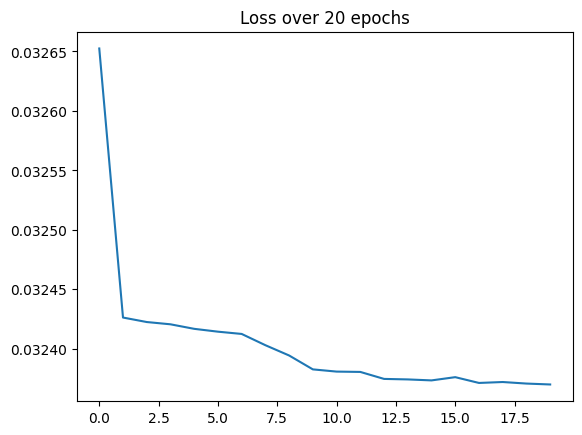

In [14]:
plt.plot(history.history["loss"])
plt.title("Loss over 20 epochs")
plt.show()

22050/22050 [==============================] - 6s 288us/step


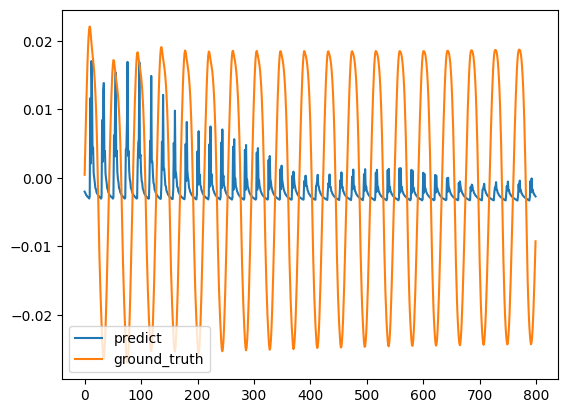

In [13]:
predictions = model.predict(X_test)

plt.plot(predictions[200:1000], label="predict")
plt.plot(y_test[200:1000], label="ground_truth")
plt.legend()
plt.show()